In [1]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [2]:
import pandas as pd
import os

## Medication Patient Data

## Filter Meds

### Med 1

In [3]:
# Male, 70-80, WHITE

In [24]:
gender = "F"
age_b = 70
age_a = 80
ethnicity = "WHITE"
stratify_prefix = f"{age_b}-{age_a}_{gender}_{ethnicity}"


In [25]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [26]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
med1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [27]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [28]:
med1 = med1[med1["AGE"]>=age_b]
med1 = med1[med1["AGE"]<=age_a]

In [30]:
med1 = med1[med1["GENDER"]==gender]
med1 = med1[med1["ETHNICITY"]==ethnicity]

In [32]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,Packed Red Blood Cells,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322598,44035,2054-12-30,F,NaN,0,223262,114515,212634.0,2128-03-08 15:00:00,2128-03-08 15:01:00,...,Insulin - Humalog,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 19:00:00,73.0
322599,44035,2054-12-30,F,NaN,0,225975,114515,212634.0,2128-03-09 08:00:00,2128-03-09 08:01:00,...,Heparin Sodium (Prophylaxis),Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,3 days 12:00:00,73.0
322600,44035,2054-12-30,F,NaN,0,226452,114515,212634.0,2128-03-09 08:00:00,2128-03-09 08:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 12:00:00,73.0
322601,44035,2054-12-30,F,NaN,0,227694,114515,212634.0,2128-03-09 08:00:00,2128-03-09 08:01:00,...,Omeprazole (Prilosec),Omeprazole (Prilosec),metavision,inputevents_mv,Medications,dose,Solution,NaN,3 days 12:00:00,73.0


In [33]:
d_m_l_doc = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.csv")).drop(columns=["Unnamed: 0"])

In [34]:
dict_d_m_l = d_m_l_doc.to_dict("records")
res_dict_mapping_med = {
    v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']
}

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/109719822.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']


In [35]:
med1["MIMICExtractLabel"] = med1.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [36]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0,Pre-Admission Intake
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0,Pantoprazole
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0,Solution
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0,Insulin - Regular
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0,Packed Red Blood Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322598,44035,2054-12-30,F,NaN,0,223262,114515,212634.0,2128-03-08 15:00:00,2128-03-08 15:01:00,...,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 19:00:00,73.0,Insulin - Humalog
322599,44035,2054-12-30,F,NaN,0,225975,114515,212634.0,2128-03-09 08:00:00,2128-03-09 08:01:00,...,Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,3 days 12:00:00,73.0,Heparin Sodium (Prophylaxis)
322600,44035,2054-12-30,F,NaN,0,226452,114515,212634.0,2128-03-09 08:00:00,2128-03-09 08:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 12:00:00,73.0,PO Intake
322601,44035,2054-12-30,F,NaN,0,227694,114515,212634.0,2128-03-09 08:00:00,2128-03-09 08:01:00,...,Omeprazole (Prilosec),metavision,inputevents_mv,Medications,dose,Solution,NaN,3 days 12:00:00,73.0,Omeprazole


### Med 2

In [37]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [38]:
h_adm_2 = med2.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
adm_2 = med2[med2.HADM_ID.isin(h_adm_2)]

In [39]:
med2 = med2.drop(columns=["Unnamed: 0"])

In [40]:
med2 = med2[med2["AGE"]>=age_b]
med2 = med2[med2["AGE"]<=age_a]

In [41]:
med2 = med2[med2["GENDER"]==gender]
med2 = med2[med2["ETHNICITY"]==ethnicity]

In [42]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:23:00,2155-02-04 05:31:00,...,Packed Red Blood Cells,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:15:00,80.0
1,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 05:52:00,2155-02-04 05:53:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 09:37:00,80.0
2,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Pantoprazole (Protonix),Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 15:45:00,80.0
3,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Solution,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 15:45:00,80.0
4,249,2075-03-13,F,NaN,0,226452,149546,269035.0,2155-02-04 17:00:00,2155-02-04 17:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 20:45:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237168,43982,2065-04-17,F,NaN,0,225154,144231,285986.0,2142-04-06 00:47:00,2142-04-06 00:48:00,...,Morphine Sulfate,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,11 days 14:34:00,77.0
237169,43982,2065-04-17,F,NaN,0,225851,144231,285986.0,2142-04-07 10:00:00,2142-04-07 10:01:00,...,Cefepime,Cefepime,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,12 days 23:47:00,77.0
237170,43982,2065-04-17,F,NaN,0,223260,144231,285986.0,2142-04-08 12:20:00,2142-04-08 12:21:00,...,Insulin - Glargine,Insulin - Glargine,metavision,inputevents_mv,Medications,units,Solution,NaN,14 days 02:07:00,77.0
237320,44035,2054-12-30,F,NaN,0,225975,114515,212634.0,2128-03-09 16:20:00,2128-03-09 16:21:00,...,Heparin Sodium (Prophylaxis),Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,3 days 20:20:00,73.0


In [43]:
med2["MIMICExtractLabel"] = med2.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [44]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
0,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:23:00,2155-02-04 05:31:00,...,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:15:00,80.0,Packed Red Blood Cells
1,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 05:52:00,2155-02-04 05:53:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 09:37:00,80.0,Insulin - Regular
2,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 15:45:00,80.0,Pantoprazole
3,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 15:45:00,80.0,Solution
4,249,2075-03-13,F,NaN,0,226452,149546,269035.0,2155-02-04 17:00:00,2155-02-04 17:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 20:45:00,80.0,PO Intake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237168,43982,2065-04-17,F,NaN,0,225154,144231,285986.0,2142-04-06 00:47:00,2142-04-06 00:48:00,...,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,11 days 14:34:00,77.0,Morphine Sulfate
237169,43982,2065-04-17,F,NaN,0,225851,144231,285986.0,2142-04-07 10:00:00,2142-04-07 10:01:00,...,Cefepime,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,12 days 23:47:00,77.0,Cefepime
237170,43982,2065-04-17,F,NaN,0,223260,144231,285986.0,2142-04-08 12:20:00,2142-04-08 12:21:00,...,Insulin - Glargine,metavision,inputevents_mv,Medications,units,Solution,NaN,14 days 02:07:00,77.0,Insulin - Glargine
237320,44035,2054-12-30,F,NaN,0,225975,114515,212634.0,2128-03-09 16:20:00,2128-03-09 16:21:00,...,Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,3 days 20:20:00,73.0,Heparin Sodium (Prophylaxis)


## Filter Labs

In [45]:
# labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/217279848.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract.csv"))


Text(0.5, 1.0, 'Distribution of age')

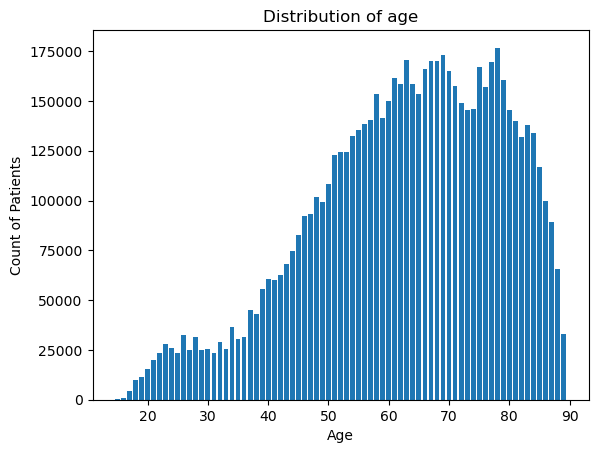

In [46]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [47]:
labs = labs.drop(columns=["Unnamed: 0"])
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
0,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,0.5,"Bilirubin, Total",CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50885,ENGL,DIVORCED,PROTESTANT QUAKER,58526,0.5,mg/dL
1,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,2.7,Creatinine,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50912,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.7,mg/dL
2,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,4.9,Potassium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50971,ENGL,DIVORCED,PROTESTANT QUAKER,58526,4.9,mEq/L
3,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,10.0,Alanine aminotransferase,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50861,ENGL,DIVORCED,PROTESTANT QUAKER,58526,10.0,IU/L
4,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,16.0,Asparate aminotransferase,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50878,ENGL,DIVORCED,PROTESTANT QUAKER,58526,16.0,IU/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062478,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,4.4,Potassium serum,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227442,ENGL,MARRIED,JEWISH,40370,4.4,mEq/L
7062479,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,8.4,Calcium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,225625,ENGL,MARRIED,JEWISH,40370,8.4,mg/dL
7062480,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
7062481,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L


In [48]:
labs = labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

In [49]:
labs = labs[labs["AGE"]>=age_b]
labs = labs[labs["AGE"]<=age_a]

In [50]:
labs = labs[labs["GENDER"]==gender]
labs = labs[labs["ETHNICITY"]==ethnicity]

In [51]:
labs.shape

(184899, 31)

Text(0.5, 1.0, 'Distribution of age')

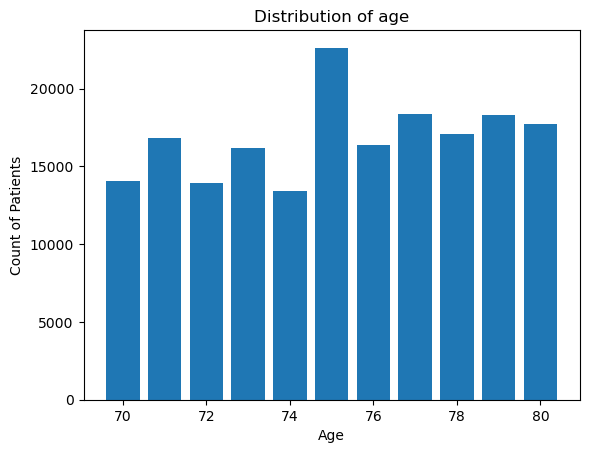

In [52]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [53]:
import pickle
final_mapping_lab_itemids = pickle.load(open("/Users/yanpavan/Desktop/d.pkl", "rb"))

In [54]:
final_itemids_list = list(final_mapping_lab_itemids.keys())

## Pairs

In [55]:
counts = med1.groupby(["MIMICExtractLabel"]).count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts

,HADM_ID
MIMICExtractLabel,
NaCl 0.9%,1137
Dextrose 5%,967
PO Intake,920
Solution,744
Magnesium Sulfate,690
...,...
Pentobarbital,1
Peptamen 1.5 (3/4),1
Isosource 1.5 (2/3),1


In [56]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [57]:
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
2032,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,0.8,Creatinine,CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,1,0,Medicare,50912,ENGL,SINGLE,CATHOLIC,53456,0.8,mg/dL
2033,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,1.4,Prothrombin time INR,CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,1,0,Medicare,51237,ENGL,SINGLE,CATHOLIC,53456,1.4,NaN
2034,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,3.4,Potassium,CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,1,0,Medicare,50971,ENGL,SINGLE,CATHOLIC,53456,3.4,mEq/L
2035,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,7.7,"Bilirubin, Total",CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,1,0,Medicare,50885,ENGL,SINGLE,CATHOLIC,53456,7.7,mg/dL
2036,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,14.0,Lipase,CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,1,0,Medicare,50956,ENGL,SINGLE,CATHOLIC,53456,14.0,IU/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057913,199948.0,2102-02-22 13:28:00,2102-02-27 05:25:00,2.0,Magnesium,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,74.0,NaN,RECTAL PROLAPSE,...,1,0,Medicare,50960,ENGL,DIVORCED,NOT SPECIFIED,49225,2.0,mg/dL
7057914,199948.0,2102-02-22 13:28:00,2102-02-27 05:25:00,3.9,Potassium,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,74.0,NaN,RECTAL PROLAPSE,...,1,0,Medicare,50971,ENGL,DIVORCED,NOT SPECIFIED,49225,3.9,mEq/L
7057915,199948.0,2102-02-22 13:28:00,2102-02-27 05:25:00,8.4,Calcium,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,74.0,NaN,RECTAL PROLAPSE,...,1,0,Medicare,50893,ENGL,DIVORCED,NOT SPECIFIED,49225,8.4,mg/dL
7057916,199948.0,2102-02-22 13:28:00,2102-02-27 05:25:00,78.0,Glucose,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,74.0,NaN,RECTAL PROLAPSE,...,1,0,Medicare,50931,ENGL,DIVORCED,NOT SPECIFIED,49225,78.0,mg/dL


In [58]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

In [59]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [60]:
labs["MIMICExtractName"] = labs["MIMICExtractName"].apply(lambda r: r.strip())
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM,LabTimeFromAdmit,hours_in
2032,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,0.8,Creatinine,CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,Medicare,50912,ENGL,SINGLE,CATHOLIC,53456,0.8,mg/dL,-1 days +22:48:00,-1.20
2033,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,1.4,Prothrombin time INR,CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,Medicare,51237,ENGL,SINGLE,CATHOLIC,53456,1.4,NaN,-1 days +22:48:00,-1.20
2034,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,3.4,Potassium,CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,Medicare,50971,ENGL,SINGLE,CATHOLIC,53456,3.4,mEq/L,-1 days +22:48:00,-1.20
2035,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,7.7,"Bilirubin, Total",CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,Medicare,50885,ENGL,SINGLE,CATHOLIC,53456,7.7,mg/dL,-1 days +22:48:00,-1.20
2036,100028.0,2142-12-23 18:06:00,2142-12-23 16:54:00,14.0,Lipase,CLINIC REFERRAL/PREMATURE,EMERGENCY,73.0,NaN,CHOLANGITIS,...,Medicare,50956,ENGL,SINGLE,CATHOLIC,53456,14.0,IU/L,-1 days +22:48:00,-1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057913,199948.0,2102-02-22 13:28:00,2102-02-27 05:25:00,2.0,Magnesium,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,74.0,NaN,RECTAL PROLAPSE,...,Medicare,50960,ENGL,DIVORCED,NOT SPECIFIED,49225,2.0,mg/dL,4 days 15:57:00,111.95
7057914,199948.0,2102-02-22 13:28:00,2102-02-27 05:25:00,3.9,Potassium,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,74.0,NaN,RECTAL PROLAPSE,...,Medicare,50971,ENGL,DIVORCED,NOT SPECIFIED,49225,3.9,mEq/L,4 days 15:57:00,111.95
7057915,199948.0,2102-02-22 13:28:00,2102-02-27 05:25:00,8.4,Calcium,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,74.0,NaN,RECTAL PROLAPSE,...,Medicare,50893,ENGL,DIVORCED,NOT SPECIFIED,49225,8.4,mg/dL,4 days 15:57:00,111.95
7057916,199948.0,2102-02-22 13:28:00,2102-02-27 05:25:00,78.0,Glucose,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,74.0,NaN,RECTAL PROLAPSE,...,Medicare,50931,ENGL,DIVORCED,NOT SPECIFIED,49225,78.0,mg/dL,4 days 15:57:00,111.95


In [61]:
lab_unique_names = labs[labs.HADM_ID.isin(med1.HADM_ID.unique())]["MIMICExtractName"].unique()
lab_unique_names

array(['Creatinine', 'Prothrombin time INR', 'Potassium',
       'Bilirubin, Total', 'Lipase', 'Glucose', 'Sodium',
       'Asparate aminotransferase', 'Alanine aminotransferase',
       'Magnesium', 'Potassium serum', 'Calcium', 'Lactic acid',
       'Bilirubin, Indirect', 'Bilirubin, Direct', 'Calcium ionized',
       'Amylase', 'Creatinine urine', 'Potassium, Urine', 'Sodium, Urine',
       'Amylase, Body Fluid', 'Amylase, Ascites', 'Creatinine ascites',
       'Glucose, Ascites', 'Bilirubin, Total, Ascites',
       'Hemoglobin percent', 'Vitamin B12', 'Uric Acid', 'Glucose, CSF',
       'Glucose, Pleural', 'Calcium urine', 'Magnesium, Urine',
       'Glucose urine', 'Platelets', 'Sodium, Stool', 'Potassium, Stool',
       'Bilirubin, Total, Pleural', 'Glucose, Body Fluid',
       'Creatinine pleural', 'Amylase, Pleural', 'Prolactin',
       'Bilirubin, Total, Body Fluid', 'Uric Acid, Urine', 'Hemoglobin C',
       'Hemoglobin A2', 'Creatinine body fluid', 'Potassium, Ascites',
    

In [62]:
mimic_extract_map = pd.read_csv(os.path.join("/Users/yanpavan/Desktop/", "itemid_to_variable_map.csv"))
mimic_extract_map_small = mimic_extract_map[["LEVEL2", "MIMIC LABEL", "ITEMID"]]
lab_names = [k.lower() for k in d_m_l_doc.groupby("lab result").count()[["Medication"]].reset_index()["lab result"].to_list()]
res_dict = {}
for l in lab_names:
    res_dict[l.lower().strip()] = mimic_extract_map_small[mimic_extract_map_small.apply(lambda r: l.lower() in str(r["MIMIC LABEL"]).lower(), axis=1)].dropna()
lab_itemids, lab_labels = {}, {}
for l in res_dict:
    if res_dict[l].shape[0]>0:
        lab_labels[l] = res_dict[l].groupby("LEVEL2")["MIMIC LABEL"].apply(list).to_dict()
        lab_itemids[l] = res_dict[l].groupby("LEVEL2")["ITEMID"].apply(list).to_dict()   
del lab_itemids['ast']['Diastolic blood pressure']     
import pickle
v_r_lab_dict = pickle.load(open(os.path.join(data, "mapping_lab_itemids.pkl"), "rb"))
temp_itemids_list = {k: [i for l in list(v.values()) for i in l] for k, v in lab_itemids.items()}
for l in v_r_lab_dict:
    if l.lower().strip() in temp_itemids_list:
        items = [k[1] for k in v_r_lab_dict[l]]
        names = [k[0] for k in v_r_lab_dict[l]]
        diff = list(set(items).difference(set(temp_itemids_list[l.lower().strip()])))
        if len(diff)>0:
            for k in diff:
               lab_itemids[l.lower().strip()][names[items.index(k)]] = [k]
    else:
        for l1 in v_r_lab_dict[l]:
            if l1[0] not in lab_itemids:
                lab_itemids[l1[0]] = {}
                lab_itemids[l1[0]][l1[0]] = [l1[1]]


In [63]:
orig = ['alt',
 'ana',
 'ast',
 'hemoglobin',
 'inr',
 'bilirubin',
 'calcium',
 'creatinine',
 'glucose',
 'lactic acid',
 'magnesium',
 'platelets',
 'potassium',
 'sodium']
dict_lab_mapping = {
    k:[k] for k in orig
}


rest = ['Uric Acid',
 'Uric Acid, Urine',
 'Vitamin B12',
 'Prolactin',
 'Amylase',
 'Amylase, Ascites',
 'Amylase, Body Fluid',
 'Amylase, Joint Fluid',
 'Amylase, Pleural',
 'Amylase, Urine',
 'Lipase',
 'Lipase, Ascites',
 'Lipase, Body Fluid']
dict_lab_mapping["Uric acid".lower()] = ['Uric Acid', 'Uric Acid, Urine']
dict_lab_mapping["B12".lower()] = ['Vitamin B12']
dict_lab_mapping["prolactin".lower()] = ['Prolactin']
dict_lab_mapping["Amylase".lower()] = [
 'Amylase',
 'Amylase, Ascites',
 'Amylase, Body Fluid',
 'Amylase, Joint Fluid',
 'Amylase, Pleural',
 'Amylase, Urine']
 
dict_lab_mapping["Lipase".lower()] = ['Lipase',
 'Lipase, Ascites',
 'Lipase, Body Fluid']


In [64]:
d_lab_map = {k.strip():[] for k in d_m_l_doc["lab result"].unique()}
for i, v in lab_itemids.items():
    if i.lower() in d_lab_map:
        d_lab_map[i.lower()].extend(list(v.keys()))
    elif i.strip() in d_lab_map:
        d_lab_map[i].extend(list(v.keys()))

d_lab_map["ALT"].extend(["Alanine aminotransferase"])
d_lab_map["ANA"].extend(["Fraction inspired oxygen"])
d_lab_map["AST"].extend(["Asparate aminotransferase"])
d_lab_map["Hemoglobin"].extend(["Hemoglobin percent", "Hemoglobin C", "Hemoglobin F", "Hemoglobin A2"])
d_lab_map["Uric acid"].extend(["Uric Acid, Urine", "Uric Acid"])
d_lab_map["Amylase"].extend(["Amylase, Ascites", "Amylase, Body Fluid", "Amylase, Joint Fluid", "Amylase, Pleural", "Amylase, Urine"])
d_lab_map["Lipase"].extend(["Lipase, Ascites", "Lipase, Body Fluid"])
d_lab_map["B12"].extend(["Vitamin B12"])
d_lab_map["INR"].extend(["Prothrombin time INR"])

In [65]:
d_lab_map

{'potassium': ['Potassium',
  'Potassium serum',
  'Potassium, Body Fluid',
  'Potassium, Pleural',
  'Potassium, Stool',
  'Potassium, Urine',
  'Potassium, Ascites'],
 'magnesium': ['Magnesium', 'Magnesium, Urine'],
 'calcium': ['Calcium', 'Calcium Ionized', 'Calcium ionized', 'Calcium urine'],
 'Uric acid': ['Uric Acid, Urine', 'Uric Acid'],
 'B12': ['Vitamin B12'],
 'lactic acid': ['Lactic acid'],
 'ALT': ['Alanine aminotransferase'],
 'AST': ['Asparate aminotransferase'],
 'Hemoglobin': ['Hemoglobin percent',
  'Hemoglobin C',
  'Hemoglobin F',
  'Hemoglobin A2'],
 'platelets': ['Platelets', 'Large Platelets'],
 'creatinine': ['Creatinine',
  'Creatinine ascites',
  'Creatinine body fluid',
  'Creatinine pleural',
  'Creatinine urine'],
 'INR': ['Prothrombin time INR'],
 'Aptt': [],
 'sodium': ['Sodium',
  'Sodium, Ascites',
  'Sodium, Body Fluid',
  'Sodium, Pleural',
  'Sodium, Stool',
  'Sodium, Urine'],
 'prolactin': ['Prolactin'],
 'CPK': [],
 'bilirubin': ['Bilirubin',
  'Bi

In [66]:
indexes = list(d_m_l_doc.groupby(["Medication", "lab result"]).count().index)

In [67]:
med_vals = [k[0].strip() for k in indexes]
labtest_vals = [k[1].strip() for k in indexes]

In [68]:
med1.MIMICExtractLabel.value_counts()

NaCl 0.9%            1137
Dextrose 5%           967
PO Intake             920
Solution              744
Magnesium Sulfate     690
                     ... 
Verapamil               1
Foscarnet               1
Pentobarbital           1
Pulmocare (Full)        1
Lipids 20%              1
Name: MIMICExtractLabel, Length: 210, dtype: int64

In [69]:
meds = []
labtests = []

meds.append('Insulin - Regular')
labtests.append('glucose')

# meds.append('Packed Red Blood Cells')
# labtests.append('Hematocrait')

meds.append('Packed Red Blood Cells')
labtests.append('Hemoglobin')

# meds.append('Packed Red Blood Cells')
# labtests.append('Red Blood Cells')

meds.append('Calcium')
labtests.append('calcium')

# meds.append('Albumin 5%')
# labtests.append('Hematocrit')

med_vals.extend(meds)
labtest_vals.extend(labtests)

In [70]:
l_med_lab = [(i[0], k) for i in zip(med_vals, labtest_vals) for k in d_lab_map[i[1]]]
labtest_vals_new = [k[1] for k in l_med_lab]

In [71]:
med_vals_new = [k[0] for k in l_med_lab]

In [72]:
[i for i in zip(med_vals, labtest_vals_new)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin percent'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin C'),
 ('Amoxicilin-clavulanate', 'Hemoglobin F'),
 ('Amoxicilin-clavulanate', 'Hemoglobin A2'),
 ('Ceftriaxone', 'Platelets'),
 ('Citalopram', 'Large Platelets'),
 ('Clozapine', 'Alanine aminotransferase'),
 ('Dabigatran', 'Asparate aminotransferase'),
 ('Esmoprazole', 'Bilirubin'),
 ('Fluoxetine', 'Bilirubin, Direct'),
 ('Furosemide', 'Bilirubin, Indirect'),
 ('Glibenclamide', 'Bilirubin, Total'),
 ('Glimepiride', 'Bilirubin, Total, Pleural'),
 ('Haloperidol', 'Bilirubin, Total, Body Fluid'),
 ('Hydrochlorothiazide', 'Bilirubin, Total, Ascites'),
 ('Hydrochlorothiazide', 'Sodium'),
 ('Metformin', 'Sodium, Ascites'),
 ('Metformin', 'Sodium, Body Fluid'),
 ('Omeprazole', 'Sodium, Pleural'),
 ('Pantoprazole', 'Sodium, Stool'),
 ('Paracetamole (acetaminophen)', 'Sodium, Urine'),
 ('Paroxetine', 'Platelets'),
 ('Procainamide', 'Large Platelets'),
 ('Quetiapine', 'Vitamin B12'),
 ('Ram

In [73]:
t_med1 = med1[med1["MIMICExtractLabel"].isin(med_vals_new)]
t_med2 = med2[med2["MIMICExtractLabel"].isin(med_vals_new)]

In [74]:
t_labs = labs[labs["MIMICExtractName"].isin(labtest_vals_new)]

In [75]:
t_labs.shape, labs.shape

((184899, 33), (184899, 33))

In [76]:
# Old - ((997, 65), (693, 64), (1319434, 39))
t_med1.shape, t_med2.shape, t_labs.shape

((2112, 65), (1711, 64), (184899, 33))

In [77]:
t_med1 = t_med1.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_med2 = t_med2.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_labs = t_labs.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractName":"ITEMID"})

In [78]:
for i in set(med_vals):
    bool_val = i in med1.MIMICExtractLabel.value_counts().to_dict()
    print(f"{i} - {bool_val}")

Glibenclamide - False
Spironolactone - False
Hydrochlorothiazide - False
Calcium - False
Amoxicilin-clavulanate - False
Quetiapine - False
Fluoxetine - False
Furosemide - True
Paroxetine - False
Clozapine - False
Citalopram - False
Acetylsalycilic acid (aspirin) - False
Ramipril - False
Procainamide - False
Metformin - False
Pantoprazole - True
Rivaroxaban - False
Omeprazole - True
Warfarin - True
Simvastatin - False
Packed Red Blood Cells - True
Ceftriaxone - True
Glimepiride - False
Insulin - Regular - True
Esmoprazole - False
Trimetoprim-sulphamethoxazole - False
Haloperidol - True
Dabigatran - False
Valsartan - False
Paracetamole (acetaminophen) - False
Valproic acid - False


In [79]:
t_med1.ITEMID.value_counts()

Insulin - Regular         561
Furosemide                545
Packed Red Blood Cells    423
Pantoprazole              323
Ceftriaxone                98
Omeprazole                 63
Haloperidol                54
Warfarin                   45
Name: ITEMID, dtype: int64

## Before After Trend Calculation

In [80]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [81]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_in']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_in']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [82]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [83]:
window = (1,25,4)

In [84]:
def get_vals(r):

    row = r.copy()
    for i in range(window[0], window[1], window[2]):

        if i==1:
            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

            b_window_start = row["MedTimeFromAdmit"].total_seconds()
            b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
            lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"before_abs_0_0"] = {}
                row[f"before_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"before_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"before_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            med2_bool = check_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
            a_window_start = row["MedTimeFromAdmit"].total_seconds()
            a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
            lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            if med2_bool:
                med2_val = get_med2(row)
                lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"after_abs_0_0"] = {}
                row[f"after_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"after_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"after_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
    
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (i*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{i}_{window[2]}"] = {}
            row[f"before_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (i*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{i}_{window[2]}"] = {}
            row[f"after_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
        
    return row

In [85]:
# type = "abs"
all_types = set(["abs", "time"])
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_a = [f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_b.extend([f"before_{t}_0_0" for t in all_types])
cols_a.extend([f"after_{t}_0_0" for t in all_types])
cols = cols_b.copy()
cols.extend(cols_a)

In [86]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [87]:
temp

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,OldITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,after_abs_13_4,after_time_13_4,before_abs_17_4,before_time_17_4,after_abs_17_4,after_time_17_4,before_abs_21_4,before_time_21_4,after_abs_21_4,after_time_21_4
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,{},{},{},{},{},{},{},{},{},{}
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,{},{},{},{},{},{},{},{},{},{}
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,{},{},{},{},{},{},{},{},{},{}
5,249,2075-03-13,F,NaN,0,221794,149546,269035.0,2155-02-04 10:00:00,2155-02-04 10:01:00,...,{'Glucose': 132.0},{'Glucose': 13.983333333333333},{},{},"{'Calcium': 8.4, 'Creatinine': 1.5, 'Glucose':...","{'Calcium': 18.883333333333333, 'Creatinine': ...",{},{},{},{}
27,249,2075-03-13,F,NaN,0,225913,149546,263055.0,2155-02-09 16:55:00,2155-02-09 16:56:00,...,{'Glucose': 184.0},{'Glucose': 15.066666666666666},{},{},{},{},{},{},{'Glucose': 159.0},{'Glucose': 21.066666666666666}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322362,43982,2065-04-17,F,NaN,0,225910,124522,262023.0,2142-03-12 08:06:00,2142-03-12 08:07:00,...,{'Glucose': 260.0},{'Glucose': 15.883333333333333},{},{},"{'Alanine aminotransferase': 13.0, 'Asparate a...",{'Alanine aminotransferase': 19.68333333333333...,"{'Calcium': 9.1, 'Creatinine': 1.7, 'Glucose':...","{'Calcium': 23.35, 'Creatinine': 23.35, 'Gluco...",{'Glucose': 305.0},{'Glucose': 21.883333333333333}
322370,43982,2065-04-17,F,NaN,0,225855,124522,262023.0,2142-03-14 10:22:00,2142-03-14 10:23:00,...,"{'Alanine aminotransferase': 11.0, 'Asparate a...",{'Alanine aminotransferase': 16.86666666666666...,"{'Calcium': 8.3, 'Creatinine': 1.6, 'Glucose':...","{'Calcium': 18.866666666666667, 'Creatinine': ...",{'Glucose': 114.0},{'Glucose': 19.616666666666667},{'Glucose': 307.0},{'Glucose': 23.25},{'Lactic acid': 0.9},{'Lactic acid': 22.166666666666668}
322371,43982,2065-04-17,F,NaN,0,223258,124522,262023.0,2142-03-14 12:33:00,2142-03-14 12:34:00,...,"{'Alanine aminotransferase': 11.0, 'Asparate a...",{'Alanine aminotransferase': 14.68333333333333...,"{'Glucose': 326.0, 'Lactic acid': 1.0}","{'Glucose': 19.55, 'Lactic acid': 20.7}","{'Glucose': 114.0, 'Lactic acid': 0.9}","{'Glucose': 17.433333333333337, 'Lactic acid':...","{'Calcium': 8.3, 'Creatinine': 1.6, 'Glucose':...","{'Calcium': 21.05, 'Creatinine': 21.05, 'Gluco...",{'Glucose': 154.0},{'Glucose': 23.433333333333334}
322377,43982,2065-04-17,F,NaN,0,221824,124522,262023.0,2142-03-18 00:40:00,2142-03-18 00:41:00,...,{},{},{'Glucose': 74.0},{'Glucose': 19.666666666666668},{'Glucose': 138.0},{'Glucose': 17.31666666666667},"{'Alanine aminotransferase': 11.0, 'Asparate a...","{'Alanine aminotransferase': 21.15, 'Asparate ...","{'Calcium': 8.6, 'Creatinine': 1.1, 'Glucose':...","{'Calcium': 24.2, 'Creatinine': 24.2, 'Glucose..."


In [88]:
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{stratify_prefix}_doc_eval.csv"))

In [89]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

In [90]:
[c[["LAB_ITEMID"]] for c in col_vals]

[           LAB_ITEMID
 3             Calcium
 4          Creatinine
 5             Glucose
 6           Magnesium
 7           Potassium
 ...               ...
 9353        Potassium
 9354  Potassium serum
 9355           Sodium
 9356          Glucose
 9357      Lactic acid
 
 [8897 rows x 1 columns],
            LAB_ITEMID
 3             Calcium
 4          Creatinine
 5             Glucose
 6           Magnesium
 7           Potassium
 ...               ...
 9353        Potassium
 9354  Potassium serum
 9355           Sodium
 9356          Glucose
 9357      Lactic acid
 
 [8897 rows x 1 columns],
            LAB_ITEMID
 0             Calcium
 1          Creatinine
 2             Glucose
 3           Magnesium
 4           Potassium
 ...               ...
 9646  Potassium serum
 9647           Sodium
 9648  Calcium ionized
 9649          Glucose
 9650      Lactic acid
 
 [9168 rows x 1 columns],
            LAB_ITEMID
 0             Calcium
 1          Creatinine
 2             Gluc

In [91]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [92]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [93]:
# t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final["LAB_NAME"] = final["LAB_ITEMID"]
final = final.rename(columns={"ITEMID":"MED_NAME"})

In [94]:
final["MED_NAME"]

0               Furosemide
1               Furosemide
2               Furosemide
3               Furosemide
4               Furosemide
               ...        
22275           Furosemide
22276         Pantoprazole
22277    Insulin - Regular
22278    Insulin - Regular
22279    Insulin - Regular
Name: MED_NAME, Length: 22280, dtype: object

In [95]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"

final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [96]:
final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [97]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [98]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [99]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_time_1_4_sp', (19488, 96)),
 ('before_abs_1_4_sp', (19488, 96)),
 ('before_time_5_4_sp', (21172, 96)),
 ('before_abs_5_4_sp', (21172, 96)),
 ('before_time_9_4_sp', (16846, 96)),
 ('before_abs_9_4_sp', (16846, 96)),
 ('before_time_13_4_sp', (15402, 96)),
 ('before_abs_13_4_sp', (15402, 96)),
 ('before_time_17_4_sp', (12900, 96)),
 ('before_abs_17_4_sp', (12900, 96)),
 ('before_time_21_4_sp', (10574, 96)),
 ('before_abs_21_4_sp', (10574, 96)),
 ('before_time_0_0_sp', (7282, 96)),
 ('before_abs_0_0_sp', (7282, 96))]

In [100]:
# type1 = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{i}_{window[2]}_sp", f"before_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2]) ]
cols_a_sp = [(f"after_{a_t[0]}_{i}_{window[2]}_sp", f"after_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2])]
cols_b_sp.append((f"before_abs_0_0_sp", f"before_time_0_0_sp"))
cols_a_sp.append((f"after_abs_0_0_sp", f"after_time_0_0_sp"))
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [101]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [102]:
plot_data.keys()

dict_keys(['before_abs_1_4_sp', 'before_abs_5_4_sp', 'before_abs_9_4_sp', 'before_abs_13_4_sp', 'before_abs_17_4_sp', 'before_abs_21_4_sp', 'before_abs_0_0_sp'])

In [103]:
import pickle
pickle.dump(plot_data, open(f"plot_bw_aw_med_lab_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [104]:
cols_sp

[('before_abs_1_4_sp', 'before_time_1_4_sp'),
 ('before_abs_5_4_sp', 'before_time_5_4_sp'),
 ('before_abs_9_4_sp', 'before_time_9_4_sp'),
 ('before_abs_13_4_sp', 'before_time_13_4_sp'),
 ('before_abs_17_4_sp', 'before_time_17_4_sp'),
 ('before_abs_21_4_sp', 'before_time_21_4_sp'),
 ('before_abs_0_0_sp', 'before_time_0_0_sp'),
 ('after_abs_1_4_sp', 'after_time_1_4_sp'),
 ('after_abs_5_4_sp', 'after_time_5_4_sp'),
 ('after_abs_9_4_sp', 'after_time_9_4_sp'),
 ('after_abs_13_4_sp', 'after_time_13_4_sp'),
 ('after_abs_17_4_sp', 'after_time_17_4_sp'),
 ('after_abs_21_4_sp', 'after_time_21_4_sp'),
 ('after_abs_0_0_sp', 'after_time_0_0_sp')]

In [105]:
final.columns

Index(['Unnamed: 0', 'SUBJECT_ID', 'DOB', 'GENDER', 'DOD', 'EXPIRE_FLAG',
       'OldITEMID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'AMOUNT',
       'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID',
       'LINKORDERID', 'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME',
       'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION',
       'PATIENTWEIGHT', 'TOTALAMOUNT', 'TOTALAMOUNTUOM', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE',
       'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y', 'SUBJECT_ID_y',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'OldLabel', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY'

In [106]:
cols_d = dict(cols_sp)

In [107]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            t_d.replace([np.inf, -np.inf], np.nan, inplace=True)
            t_d = t_d.dropna()
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_1_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_0_0_sp
Before Window:  before_abs_5_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_9_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_13_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_17_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_21_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_0_0_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

In [108]:
p_data.keys()

dict_keys([('Furosemide', 'Glucose'), ('Warfarin', 'Glucose'), ('Insulin - Regular', 'Calcium'), ('Insulin - Regular', 'Creatinine'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Magnesium'), ('Insulin - Regular', 'Platelets'), ('Insulin - Regular', 'Potassium'), ('Insulin - Regular', 'Potassium serum'), ('Insulin - Regular', 'Prothrombin time INR'), ('Insulin - Regular', 'Sodium'), ('Packed Red Blood Cells', 'Calcium ionized'), ('Packed Red Blood Cells', 'Glucose'), ('Packed Red Blood Cells', 'Potassium'), ('Pantoprazole', 'Glucose'), ('Furosemide', 'Creatinine'), ('Furosemide', 'Magnesium'), ('Furosemide', 'Potassium'), ('Furosemide', 'Potassium serum'), ('Furosemide', 'Prothrombin time INR'), ('Furosemide', 'Sodium'), ('Pantoprazole', 'Calcium'), ('Pantoprazole', 'Creatinine'), ('Pantoprazole', 'Magnesium'), ('Pantoprazole', 'Potassium'), ('Pantoprazole', 'Prothrombin time INR'), ('Pantoprazole', 'Sodium'), ('Pantoprazole', 'Calcium ionized'), ('Pantoprazole', 'Potassium

In [109]:
import pickle
pickle.dump(p_data, open(f"plot_med_lab_bw_aw_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [110]:
# p_data = pickle.load(open(f"plot_med_lab_bw_aw_data_{stratify_prefix}.pkl", "rb"))

## Plots

In [111]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [112]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [113]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [114]:
lab_units_mapping = t_labs.groupby(["ITEMID", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("ITEMID").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
ITEMID,
Alanine aminotransferase,IU/L
Amylase,IU/L
"Amylase, Ascites",IU/L
"Amylase, Body Fluid",IU/L
"Amylase, Pleural",IU/L
Asparate aminotransferase,IU/L
"Bilirubin, Direct",mg/dL
"Bilirubin, Indirect",mg/dL
"Bilirubin, Total",mg/dL


In [115]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [116]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [117]:
[i for i in zip(med_vals, labtest_vals)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'platelets'),
 ('Amoxicilin-clavulanate', 'ALT'),
 ('Amoxicilin-clavulanate', 'AST'),
 ('Ceftriaxone', 'bilirubin'),
 ('Citalopram', 'sodium'),
 ('Clozapine', 'platelets'),
 ('Dabigatran', 'Aptt'),
 ('Esmoprazole', 'B12'),
 ('Fluoxetine', 'sodium'),
 ('Furosemide', 'magnesium'),
 ('Glibenclamide', 'glucose'),
 ('Glimepiride', 'glucose'),
 ('Haloperidol', 'prolactin'),
 ('Hydrochlorothiazide', 'Uric acid'),
 ('Hydrochlorothiazide', 'calcium'),
 ('Metformin', 'B12'),
 ('Metformin', 'lactic acid'),
 ('Omeprazole', 'B12'),
 ('Pantoprazole', 'B12'),
 ('Paracetamole (acetaminophen)', 'ALT'),
 ('Paroxetine', 'sodium'),
 ('Procainamide', 'ANA'),
 ('Quetiapine', 'prolactin'),
 ('Ramipril', 'potassium'),
 ('Rivaroxaban', 'INR'),
 ('Simvastatin', 'CPK'),
 ('Spironolactone', 'potassium'),
 ('Trimetoprim-sulphamethoxazole', 'creatinine'),
 ('Trimetoprim-sulphamethoxazole', 'potassium'),
 ('Valproic acid', 'Amylas

In [118]:
t_med1.ITEMID.value_counts()

Insulin - Regular         561
Furosemide                545
Packed Red Blood Cells    423
Pantoprazole              323
Ceftriaxone                98
Omeprazole                 63
Haloperidol                54
Warfarin                   45
Name: ITEMID, dtype: int64

In [119]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [mapping[k[1]] for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [mapping[k[1]] for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [int_s(a[-7:-5]) for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [120]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = int_s(key[-7:-5])

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{int_s(key[-7:-5])}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            if len(data_vals)==0:
                continue
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            data_t = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
                data_t.append([d1, d2])
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c, t in zip(data_vals, after_names, corrs, data_t):
                # if d.shape[0]<2:
                #     continue
                # if d.shape[0]>1:
                #     d1, d2 = remove_outlier(d[type], d["time"])
                # else:
                # d1, d2 = d[[type]], d[["time"]]
                d = pd.concat(t, axis=1)

                # p_corr = pearsonr(d1[type], d2["time"])
                # s_corr = spearmanr(d1[type], d2["time"])
                p_corr = c[0]
                s_corr = c[1]

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name} bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": mapping[before_window],
                    "aw": mapping[int_s(a[-7:-5])],
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72831/768811472.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packa

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [121]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,Glucose,Furosemide,(1-5),(1-5),Absolute,0.150130,0.013359,0.130800,0.031355,271
1,Glucose,Furosemide,(1-5),(5-9),Absolute,0.180234,0.012135,0.164158,0.022535,193
2,Glucose,Furosemide,(1-5),(9-13),Absolute,0.178678,0.036011,0.158456,0.063419,138
3,Glucose,Furosemide,(1-5),(13-17),Absolute,0.077752,0.446670,0.051861,0.612045,98
4,Glucose,Furosemide,(1-5),(17-21),Absolute,0.097738,0.356697,0.093661,0.377204,91
...,...,...,...,...,...,...,...,...,...,...
9292,Alanine aminotransferase,Haloperidol,(13-17),(5-9),Percentage,-1.000000,1.000000,-1.000000,NaN,2
9293,Alanine aminotransferase,Haloperidol,(13-17),(5-9),Ratio,-1.000000,1.000000,-1.000000,NaN,2
9294,Asparate aminotransferase,Haloperidol,(13-17),(5-9),Absolute,-1.000000,1.000000,-1.000000,NaN,2
9295,Asparate aminotransferase,Haloperidol,(13-17),(5-9),Percentage,-1.000000,1.000000,-1.000000,NaN,2


In [206]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
4525,Glucose,Warfarin,(9-13),(17-21),Absolute,0.558438,0.000732,0.520124,0.001918,33
4532,Glucose,Warfarin,(9-13),(17-21),Percentage,0.551358,0.000882,0.473354,0.005398,33
4539,Glucose,Warfarin,(9-13),(17-21),Ratio,0.551358,0.000882,0.473354,0.005398,33
2566,Sodium,Pantoprazole,(17-21),(5-9),Absolute,-0.437226,0.000947,-0.415492,0.001782,54
2573,Sodium,Pantoprazole,(17-21),(5-9),Percentage,-0.437139,0.000949,-0.395065,0.003112,54
2580,Sodium,Pantoprazole,(17-21),(5-9),Ratio,-0.437139,0.000949,-0.395065,0.003112,54
988,Glucose,Furosemide,(0-1),(5-9),Absolute,0.247461,0.003314,0.257809,0.002184,139
1002,Glucose,Furosemide,(0-1),(5-9),Ratio,0.241181,0.004234,0.247801,0.003270,139
995,Glucose,Furosemide,(0-1),(5-9),Percentage,0.241181,0.004234,0.247801,0.003270,139
2811,Magnesium,Furosemide,(5-9),(17-21),Ratio,-0.367263,0.005363,-0.346423,0.008911,56


In [208]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
1525,Glucose,Ceftriaxone,(0-1),(17-21),Absolute,-0.519249,0.005512,-0.617265,0.000604,27
1532,Glucose,Ceftriaxone,(0-1),(17-21),Percentage,-0.506897,0.006968,-0.579896,0.001522,27
1539,Glucose,Ceftriaxone,(0-1),(17-21),Ratio,-0.506897,0.006968,-0.579896,0.001522,27
2090,Creatinine,Pantoprazole,(9-13),(9-13),Absolute,-0.449586,0.021206,-0.360322,0.070572,26
2566,Sodium,Pantoprazole,(17-21),(5-9),Absolute,-0.437226,0.000947,-0.415492,0.001782,54
2573,Sodium,Pantoprazole,(17-21),(5-9),Percentage,-0.437139,0.000949,-0.395065,0.003112,54
2580,Sodium,Pantoprazole,(17-21),(5-9),Ratio,-0.437139,0.000949,-0.395065,0.003112,54
4369,Sodium,Furosemide,(5-9),(9-13),Ratio,-0.373870,0.045726,-0.305079,0.107558,29
4362,Sodium,Furosemide,(5-9),(9-13),Percentage,-0.373870,0.045726,-0.305079,0.107558,29
4355,Sodium,Furosemide,(5-9),(9-13),Absolute,-0.373618,0.045884,-0.281386,0.139214,29


In [210]:
# corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))